In [1]:
import numpy as np
import cvxpy as cp

# import plotly.graph_objects as go
# import plotly.io as pio

# pio.renderers.default = "notebook"

import matplotlib.pyplot as plt

In [2]:
Date = np.array(
    [
        2022.10,
        2022.11,
        2022.12,
        2023.01,
        2023.02,
        2023.03,
        2023.04,
        2023.05,
        2023.06,
        2023.07,
        2023.08,
        2023.09,
        2023.10,
        2023.11,
    ]
)
Prod_n = np.array(["MouTai", "Gold", "NVIDIA"])
Price = np.array(
    [
        [251.06, 1672.0, 120.76],
        [209.14, 1676.6, 141.56],
        [229.69, 1815.2, 171.35],
        [243.66, 1846.1, 143.15],
        [259.85, 1942.8, 209.43],
        [258.95, 1845.4, 226.98],
        [253.81, 2000.4, 279.65],
        [246.48, 1992.2, 289.10],
        [230.41, 1995.5, 397.70],
        [242.83, 1929.5, 424.13],
        [266.06, 1978.8, 465.07],
        [260.71, 1967.1, 485.09],
        [250.28, 1847.2, 447.82],
        [250.84, 1987.5, 423.25],
    ]
)
M = 10000

In [3]:
R = np.diff(Price, axis=0) / Price[:-1]

In [4]:
r = np.mean(R, axis=0)
Sigma = np.cov(R, rowvar=False)

# (1)


In [5]:
P_0 = 500

In [6]:
x = cp.Variable(len(r))
qp = cp.Problem(
    cp.Minimize(cp.quad_form(x, Sigma)), [x @ r >= P_0, cp.sum(x) <= M, x >= 0]
)
res = qp.solve()
display(res, x.value)

np.float64(588619.0732379209)

array([ 549.38465295, 1974.7108046 , 4127.05633617])

# (2)


In [7]:
mu_vals = np.linspace(1, 10) * (10 ** (-3))

In [8]:
f = lambda mu: (
    (
        lambda x: (
            cp.Problem(
                cp.Minimize(mu * cp.quad_form(x, Sigma) - x @ r),
                [cp.sum(x) <= 10000, x >= 0],
            ).solve(),
            x.value,
            (x.value) @ r,
            (x.value).T @ Sigma @ (x.value),
            cp.quad_form(x.value, Sigma),
        )
    )(cp.Variable(len(r)))
)

In [9]:
res = [f(mu) for mu in mu_vals]

Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optimal point
Polishing not needed - no active set detected at optima

In [10]:
# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x=mu_vals,
#         y=[rs[2] for rs in res],
#         mode="lines",
#         line=dict(color="green"),
#         name="Profit",
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=mu_vals,
#         y=[rs[3] for rs in res] * mu_vals,
#         mode="lines",
#         line=dict(color="red"),
#         name="Losses",
#     )
# )

# fig.update_layout(
#     title=r"$\text{different } \mu \text{s}$",
#     xaxis_title=r"$\mu$",
#     yaxis_title="Money($)",
#     showlegend=True,
#     width=800,
#     height=600,
# )
# fig.show()

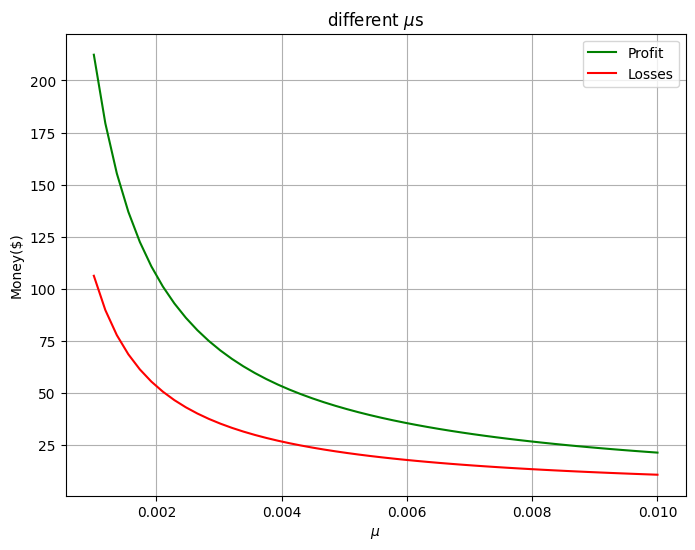

In [11]:
fig = plt.figure(figsize=(8, 6))

plt.plot(mu_vals, [rs[2] for rs in res], linestyle="-", color="green", label="Profit")
plt.plot(
    mu_vals, [rs[3] for rs in res] * mu_vals, linestyle="-", color="red", label="Losses"
)

plt.title(r"$\text{different } \mu \text{s}$")
plt.xlabel(r"$\mu$")
plt.ylabel("Money($)")
plt.grid(True)
plt.legend()
plt.show()